In [1]:
from datetime import date
date.today()

datetime.date(2017, 12, 26)

In [2]:
author = "NirantK. https://github.com/NirantK/keras-practice"
print(author)

NirantK. https://github.com/NirantK/keras-practice


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.0.8


In [5]:
import os
if os.name=='nt':
    print('We are on Windows')

Prerequisites: 
- Python programming experience
- Familiarity with machine learning vocabulary
   * Refer [Ailyen Blog](http://blog.aylien.com/10-machine-learning-terms-explained-in-simple/) - 5 minutes read or [Google's Machine Learning Glossary](https://developers.google.com/machine-learning/glossary/) when you see/hear new terms
    
Nice to have (will build upon these topics)
- Familiarity with deep feed forward networks
- Understand backpropagation 
- Familiarity with activation functions like relu, tanh, softmax, hierarchical softmax

**We will start with an introduction to the theory behind convnets, specifically:**

- What is convolution and max-pooling?   
- What are convnets?
- What do convnets learn?

Then we will cover image classification with **small datasets**:

- Training your own small convnets from scratch
- Using data augmentation to mitigate overfitting
- Using a pre-trained convnet to do feature extraction
- Fine-tuning a pre-trained convnet

Motivation
---
We will use our convnet to classify **MNIST digits**

![](https://raw.githubusercontent.com/datapythonista/mnist/master/img/samples.png)

## In this notebook: 
- MNIST Demo
    - Using Convolution Layers
- Code Overview

### In next notebook:
- What is convolution and maxpooling? 
- What are convnets? 
- What do convnets learn? 

![](https://www.tensorflow.org/images/MNIST-Matrix.png)

MNIST is a very popular dataset in computer vision community as a proof of concept. 

    *If it does not work on MNIST, it will not work. If it works on MNSIT, it might work*
    
People have used this for lot of cool stuff including synthesizing digits. 
![](https://www.youtube.com/watch?v=LzE1fF0_3q0)

In [6]:
print('People have used MNIST for lot of cool stuff including synthesizing digits. Here is a video from 2009:')
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LzE1fF0_3q0?rel=0" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>')

People have used MNIST for lot of cool stuff including synthesizing digits. Here is a video from 2009:


# Let's start with CNN and Keras

**Sample CNN schematic**:

![](https://www.kernix.com/doc/data/cnn.png)


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

The 6 lines of code show you what a basic convnet looks like. It’s a stack of ```Conv2D``` and ```MaxPooling2D``` layers. 

**We’ll see in the next notebook what they do concretely**

But to give you a brief overview:

This is the [convolution](https://www.wikiwand.com/en/Convolution#/Visual_explanation) operation: 
     
     Convolution is a mathematical operation on two functions (f and g) to produce a third function, that is typically viewed as a modified version of one of the original functions

![](http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif)

![](http://deeplearning.net/software/theano/_images/numerical_no_padding_no_strides.gif)
    


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

The next step would be to feed our last output 3D matrix (of `shape (3, 3, 64)`) into a densely-connected classifier network like those you are already familiar with: *a stack of Dense layers*. 

These classifiers process vectors, which are 1D, whereas our current output is a 3D matrix. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top:

**What are Dense Layers?**

A dense layer is a kind of hidden layer where every node is connected to every other node in the next layer. A stack of dense layers acts as a classifier quite often in NN Arch Design. 

**Then, what is the hidden layer?**  

These are intermediate layers between the input and the output layer. These could be of various types, For example, the convolutional layer in convnets is a hidden layer.

In [10]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [12]:
# Preprocessing

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Converts the image binary data into desired shapes on numpy.float32 matrices
train_images = train_images.reshape((60000, 28, 28, 1))

# Squash the data to 0 to 1 or -1 to 1 as per requirements
train_images = train_images.astype('float32') / 255
print('Preview train images:')
print(train_images[0][5])

print('\n------------------\nBefore converting to categories:', train_labels)
# We convert this to categories instead of number labels
# Conversion to categories means converting to binary matrices in our case (thanks Keras!)
train_labels = to_categorical(train_labels)
print('\n------------------\nAfter converting to categories:', train_labels)

11476992/11490434 [============================>.] - ETA: 0sPreview train images:
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.01176471]
 [ 0.07058824]
 [ 0.07058824]
 [ 0.07058824]
 [ 0.49411765]
 [ 0.53333336]
 [ 0.68627453]
 [ 0.10196079]
 [ 0.65098041]
 [ 1.        ]
 [ 0.96862745]
 [ 0.49803922]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

------------------
Before converting to categories: [5 0 4 ..., 5 6 8]

------------------
After converting to categories: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [13]:
# Repeating above process for the test images
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

test_labels = to_categorical(test_labels)

To make our network ready for training, we need to pick three more things, as part of compilation step:
---
- Loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction


- Optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function


- Metrics: to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified

*from Deep Learning by Python by F. Chollet*

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
%time history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 5s - loss: 0.1702 - acc: 0.9468     
Epoch 2/5
60000/60000 [==============================] - 3s - loss: 0.0472 - acc: 0.9852     
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.0327 - acc: 0.9899     
Epoch 4/5
60000/60000 [==============================] - 3s - loss: 0.0244 - acc: 0.9924     
Epoch 5/5
60000/60000 [==============================] - 3s - loss: 0.0205 - acc: 0.9933     
CPU times: user 22.1 s, sys: 2.79 s, total: 24.9 s
Wall time: 17.7 s


**Important: We have separate train, validate and test datasets!**

Why not simply have two sets, a training set and a test set? We would train on the training data, and evaluate on the test data. Much simpler!

The reason is that developing a model always involves tuning its configuration. You will do this tuning by using as feedback signal the performance of the model on the validation data. 

In essence this tuning is a form of learning: a search for a good configuration in some parameter space. 

As a result, tuning the configuration of the model based on its performance on the validation set can quickly result in overfitting to the validation set, even though your model is never being directly trained on it.

Note that the call to model.fit() returns a `History` object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s take a look at it:

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss'])

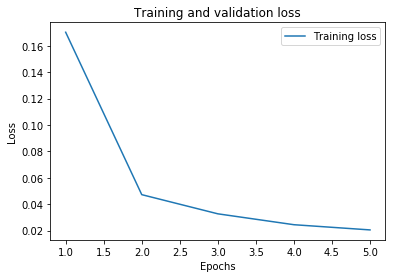

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
# plt.plot(epochs, acc, label='Acc')
plt.plot(epochs, loss,label='Training loss')
# b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

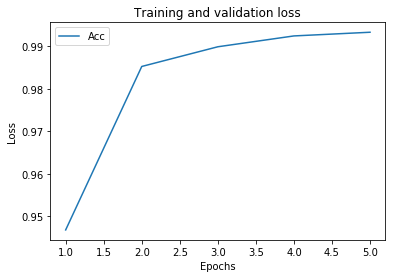

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, label='Acc')
# plt.plot(epochs, loss,label='Training loss')
# b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Model Performance

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

 9216/10000 [==========================>...] - ETA: 0sTest Accuracy: 0.991


### In this notebook you saw: 
- MNIST Demo
    - Convolution layers
    - Brief intro what a network looks like
- Code Overview
    - Code outline in Keras

#### In next notebook:
- What is convolution and maxpooling? 
- What are convnets? 
- What do convnets learn? 